<a href="https://colab.research.google.com/github/IvanKatorgin/Deep-Learning/blob/main/Deep_Learning_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Deep Learning". Домашнее задание 6. Рекуррентные сети. Каторгин И.П.

## Задание

Задание 1. Обучите нейронную сеть решать шифр Цезаря.

Что необходимо сделать:
- Написать алгоритм шифра Цезаря для генерации выборки (сдвиг на К каждой буквы. Например, при сдвиге на 2 буква “А” переходит в букву “В” и тп)
- Сделать нейронную сеть
- Обучить ее (вход - зашифрованная фраза, выход - дешифрованная фраза)
- Проверить качество

Задание 2. Выполнить практическую работу из лекционного ноутбука.
- Построить RNN-ячейку на основе полносвязных слоев
- Применить построенную ячейку для генерации текста с выражениями героев сериала “Симпсоны”

## Задание 1. Обучите нейронную сеть решать шифр Цезаря

Написать алгоритм шифра Цезаря для генерации выборки (сдвиг на К каждой буквы. Например, при сдвиге на 2 буква “А” переходит в букву “В” и тп)

In [ ]:
# загрузим библиотеки
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, time, torch, random
from torch.utils.data import TensorDataset, DataLoader
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# функция шифрования по алгоритму Цезаря
def caesar_cipher(text, shift, language='russian'):
  # определяем алфавиты для каждого языка
    if language == 'russian':
        alphabet_upper = 'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ'
        alphabet_lower = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
    elif language == 'english':
        alphabet_upper = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
        alphabet_lower = 'abcdefghijklmnopqrstuvwxyz'
    else:
        raise ValueError('Unsupported language')

    result = []
    for char in text:
        if char in alphabet_upper:
            # Для заглавных букв
            index = (alphabet_upper.index(char) + shift) % len(alphabet_upper)
            result.append(alphabet_upper[index])
        elif char in alphabet_lower:
            # Для строчных букв
            index = (alphabet_lower.index(char) + shift) % len(alphabet_lower)
            result.append(alphabet_lower[index])
        else:
            # Не буквы оставляем как есть
            result.append(char)
    return ''.join(result)

In [ ]:
# Пример использования:
text = "Привет, мир!"
shift = 3
encrypted = caesar_cipher(text, shift)
print(encrypted)

Тулезх, плу!


In [ ]:
# Вернем обратно:
text = "Тулезх, плу!"
shift = -3
encrypted = caesar_cipher(text, shift)
print(encrypted)

Привет, мир!


In [ ]:
# Пример использования:
text = "Привет, мир!"
shift = 1
encrypted = caesar_cipher(text, shift)
print(encrypted)

Рсйгёу, нйс!


In [ ]:
# Вернем обратно:
text = "Рсйгёу, нйс!"
shift = -1
encrypted = caesar_cipher(text, shift)
print(encrypted)

Привет, мир!


In [ ]:
# Пример использования на английском:
text_en = "Hello, World!"
shift_en = 5
encrypted_en = caesar_cipher(text_en, shift_en, language='english')
print(encrypted_en)

Mjqqt, Btwqi!


In [ ]:
text_en = "Mjqqt, Btwqi!"
shift_en = -5
encrypted_en = caesar_cipher(text_en, shift_en, language='english')
print(encrypted_en)

Hello, World!


Все работает корректно

Сделать нейронную сеть

Создаём массив с данными

In [ ]:
CHIHERS = set('АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдеёжзийклмнопрстуфхцчшщъыьэюяABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz ')  # все символы, которые мы хотим использовать для кодировки = наш словарь
INDEX_TO_CHIHER = ['none'] + list(CHIHERS)  # все неизвестные символы будут получать тег none
CHIHER_TO_INDEX = {w: i for i, w in enumerate(INDEX_TO_CHIHER)}  # словарь токен-индекс

In [ ]:
len(INDEX_TO_CHIHER)

120

In [ ]:
# Генерация случайных текстов для обучения
def generate_texts(num_samples=10000, max_len=70):
    texts = []
    for _ in range(num_samples):
        length = random.randint(10, max_len)
        text = ''.join(random.choice(list(CHIHERS)) for _ in range(length))
        texts.append(text)
    return texts

texts = generate_texts()  # 10000 случайных текстов

In [ ]:
# отобразим последние 10 сгенерырованных текстов
texts[-10:]

['YfXЪёЪsTDJKВЩqуXлZgAЭDAК',
 'qйЧяДШИvWГйэНVэtыpQФblгDГЮмQЕИВlТИL',
 'ТpющkкмЁPбЪtСИQWsJtEюУzTFбъПvwАЪnA',
 'ГШKТчщpRMЦXщАbdШBOШnЭйУпрBYУDmМАUЙФкЬFмpСно',
 'aЪфыОkЖэмL цДИCРxbнD',
 'мсБЙшYцcРNДЕкfЭЮwWеdSЦХЁIKWпАчШцоBaTIiлмtТуFaDукiЗПНuF',
 'cYJdi ТтHъОmbуnдцРoцКfЮяcНЯ ъЫбхПZXVmъFХсЕИPхЕгьe',
 'лfуVЖчцVеBнnrпtЗхMъhfТюеИПСРVфYppKцeаУQyfЧEAЭsxШЗ',
 'йОЭЙRЩГЬqAвцнHUEHНoЬМVъЯl',
 'зшDёУFдтКуxИФЦжЧзэЙшьgKвмГЫEMbHМэцЧОвтG ьUkGюзеLЮТУЁmйUРDЙqЯwd']

Подготовка X и Y

In [ ]:
MAX_LEN = 70  # мы хотим ограничить максимальную длину ввода
X = torch.zeros((len(texts), MAX_LEN), dtype=torch.long)  # создаём пустой вектор для текста, чтобы класть в него индексы токенов

for i, text in enumerate(texts):  # для каждого предложения
    for j, char in enumerate(text[:MAX_LEN]):  # для каждого токена
        X[i, j] = CHIHER_TO_INDEX.get(char, CHIHER_TO_INDEX['none'])

In [ ]:
# Y — это X, но сдвинутый на 1 (предсказываем следующую букву)
Y = X[:, 1:].clone()
X = X[:, :-1]

Создадим DataLoader

In [ ]:
dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

Реализация сети с RNN

In [ ]:
class Network(torch.nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.embedding = torch.nn.Embedding(len(INDEX_TO_CHIHER), 30)
        self.rnn = torch.nn.RNN(30, 128, batch_first=True)
        self.out = torch.nn.Linear(128, len(INDEX_TO_CHIHER))

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x) # берём выход с последнего слоя для всех токенов, а не скрытое состояние
        return self.out(x)

In [ ]:
model = Network()

In [ ]:
criterion = torch.nn.CrossEntropyLoss()  # типичный лосс многоклассовой классификации
optimizer = torch.optim.SGD(model.parameters(), lr=.05)

Обучить ее (вход - зашифрованная фраза, выход - дешифрованная фраза)

Epoch 0. Time: 5.059, Train loss: 2.871
Epoch 1. Time: 5.438, Train loss: 2.771
Epoch 2. Time: 5.626, Train loss: 2.768
Epoch 3. Time: 5.035, Train loss: 2.766
Epoch 4. Time: 6.931, Train loss: 2.764
Epoch 5. Time: 5.050, Train loss: 2.763
Epoch 6. Time: 5.980, Train loss: 2.762
Epoch 7. Time: 5.052, Train loss: 2.761
Epoch 8. Time: 5.974, Train loss: 2.760
Epoch 9. Time: 5.490, Train loss: 2.759
Epoch 10. Time: 5.873, Train loss: 2.758
Epoch 11. Time: 6.487, Train loss: 2.758
Epoch 12. Time: 5.838, Train loss: 2.757
Epoch 13. Time: 5.729, Train loss: 2.756
Epoch 14. Time: 5.047, Train loss: 2.755
Epoch 15. Time: 5.938, Train loss: 2.754
Epoch 16. Time: 5.040, Train loss: 2.752
Epoch 17. Time: 6.207, Train loss: 2.752
Epoch 18. Time: 5.680, Train loss: 2.751
Epoch 19. Time: 6.134, Train loss: 2.751
Epoch 20. Time: 5.038, Train loss: 2.750
Epoch 21. Time: 5.074, Train loss: 2.750
Epoch 22. Time: 5.893, Train loss: 2.749
Epoch 23. Time: 5.121, Train loss: 2.749
Epoch 24. Time: 5.936, Tra

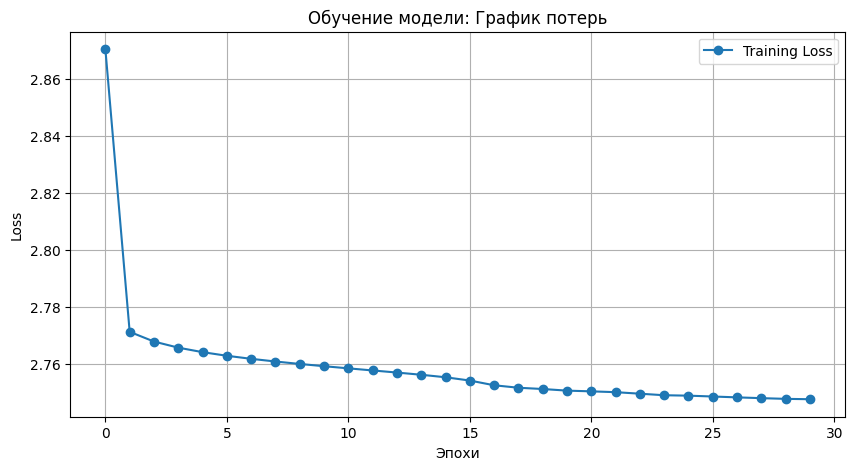

In [ ]:
# Обучение и визуализация

train_losses = []

for epoch in range(30):
    start = time.time()
    epoch_loss = 0.0
    train_passed = 0

    for batch_X, batch_Y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs.view(-1, len(INDEX_TO_CHIHER)), batch_Y.view(-1))
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        train_passed += 1

    avg_loss = epoch_loss / train_passed
    train_losses.append(avg_loss)
    print(f"Epoch {epoch}. Time: {time.time() - start:.3f}, Train loss: {avg_loss:.3f}")

# Визуализация графика
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.title('Обучение модели: График потерь')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Проверить качество

In [ ]:
def calculate_accuracy(model, dataloader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for batch_X, batch_Y in dataloader:
            outputs = model(batch_X)
            predicted = torch.argmax(outputs, dim=-1)
            correct += (predicted == batch_Y).sum().item()
            total += batch_Y.numel()
    return correct / total

In [ ]:
calculate_accuracy(model, dataloader)

0.4391086956521739

Accuracy не самый лучший. 0,439 - это очень мало

Проверим модель. Подадим текст и дешифрируем его

In [ ]:
def decrypt_text(model, encrypted_text, max_len=70):
    # Преобразуем текст в индексы
    x = torch.zeros((1, max_len), dtype=torch.long)
    for j, char in enumerate(encrypted_text[:max_len]):
        x[0, j] = CHIHER_TO_INDEX.get(char, CHIHER_TO_INDEX['none'])

    # Предсказываем следующий символ для каждого положения
    model.eval()
    with torch.no_grad():
        outputs = model(x)
        predicted_indices = torch.argmax(outputs, dim=-1).squeeze().tolist()

    # Преобразуем индексы обратно в текст
    decrypted_text = []
    for idx in predicted_indices:
        if idx < len(INDEX_TO_CHIHER):
            decrypted_text.append(INDEX_TO_CHIHER[idx])
        else:
            decrypted_text.append('?')  # Неизвестный символ
    return ''.join(decrypted_text).replace('none', '')

In [ ]:
# Тестируем на зашифрованном тексте
encrypted_text = "Тулезх, плу!"  # "Привет, мир!" с shift=3
decrypted_text = decrypt_text(model, encrypted_text)
print(f"Зашифрованный текст: {encrypted_text}")
print(f"Дешифрованный текст: {decrypted_text}")

Зашифрованный текст: Тулезх, плу!
Дешифрованный текст: Y


In [ ]:
# Тестируем на зашифрованном тексте
encrypted_text = "Рсйгёу, нйс!"  # "Привет, мир!" с shift=1
decrypted_text = decrypt_text(model, encrypted_text)
print(f"Зашифрованный текст: {encrypted_text}")
print(f"Дешифрованный текст: {decrypted_text}")

Зашифрованный текст: Рсйгёу, нйс!
Дешифрованный текст: Omдimр


Дешифрирует не очень. Постоянно ошибается. Нужно нейросеть улучшать и обучать дальше. В текущем виде модель для дальнейшего использования не подходит

## Задание 2. Выполнить практическую работу из лекционного ноутбука

- Построить RNN-ячейку на основе полносвязных слоев
- Применить построенную ячейку для генерации текста с выражениями героев сериала “Симпсоны”

In [ ]:
# загрузим датасет
df = pd.read_csv('simpsons_script_lines.csv')
df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


In [ ]:
phrases = df['normalized_text'].tolist()  # колонка с предобработанными текстами
phrases[:10]

['no actually it was a little of both sometimes when a disease is in all the magazines and all the news shows its only natural that you think you have it',
 'wheres mr bergstrom',
 'i dont know although id sure like to talk to him he didnt touch my lesson plan what did he teach you',
 'that life is worth living',
 'the polls will be open from now until the end of recess now just in case any of you have decided to put any thought into this well have our final statements martin',
 'i dont think theres anything left to say',
 'bart',
 'victory party under the slide',
 nan,
 'mr bergstrom mr bergstrom']

In [ ]:
text = [[c for c in ph] for ph in phrases if type(ph) is str]

Создаём массив с данными

In [ ]:
CHARS = set('abcdefghijklmnopqrstuvwxyz ')  # все символы, которые мы хотим использовать для кодировки = наш словарь
INDEX_TO_CHAR = ['none'] + [w for w in CHARS]  # все неизвестные символы будут получать тег none
CHAR_TO_INDEX = {w: i for i, w in enumerate(INDEX_TO_CHAR)}  # словарь токен-индекс

In [ ]:
len(INDEX_TO_CHAR)

28

In [ ]:
MAX_LEN = 70  # мы хотим ограничить максимальную длину ввода
X = torch.zeros((len(text), MAX_LEN), dtype=int)  # создаём пустой вектор для текста, чтобы класть в него индексы токенов
for i in range(len(text)):  # для каждого предложения
    for j, w in enumerate(text[i]):  # для каждого токена
        if j >= MAX_LEN:
            break
        X[i, j] = CHAR_TO_INDEX.get(w, CHAR_TO_INDEX['none'])

In [ ]:
X[0:5]

tensor([[18,  3, 20,  7,  2, 15, 21,  7,  6,  6, 14, 20,  4, 15, 20,  8,  7, 19,
         20,  7, 20,  6,  4, 15, 15,  6, 12, 20,  3, 26, 20, 24,  3, 15, 23, 20,
         19,  3, 16, 12, 15,  4, 16, 12, 19, 20,  8, 23, 12, 18, 20,  7, 20,  9,
          4, 19, 12,  7, 19, 12, 20,  4, 19, 20,  4, 18, 20,  7,  6,  6],
        [ 8, 23, 12, 22, 12, 19, 20, 16, 22, 20, 24, 12, 22,  5, 19, 15, 22,  3,
         16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 4, 20,  9,  3, 18, 15, 20, 17, 18,  3,  8, 20,  7,  6, 15, 23,  3, 21,
          5, 23, 20,  4,  9, 20, 19, 21, 22, 12, 20,  6,  4, 17, 12, 20, 15,  3,
         20, 15,  7,  6, 17, 20, 15,  3, 20, 23,  4, 16, 20, 23, 12, 20,  9,  4,
          9, 18, 15, 20, 15,  3, 21,  2, 23, 20, 16, 14, 20,  6, 12, 19],
        [15, 23,  7, 15, 20,  6,  4, 26, 12, 20, 

Embedding и RNN ячейки


In [ ]:
X[0:5].shape

torch.Size([5, 70])

In [ ]:
embeddings = torch.nn.Embedding(len(INDEX_TO_CHAR), 28)  # размер словаря * размер вектора для кодировки каждого слова
t = embeddings(X[0:5])
t.shape

torch.Size([5, 70, 28])

In [ ]:
t.shape, X[0:5].shape

(torch.Size([5, 70, 28]), torch.Size([5, 70]))

In [ ]:
rnn = torch.nn.RNN(28, 128, batch_first=True)  # на вход - размер эмбеддинга, размер скрытого состояния и порядок размерностей
o, s = rnn(t)
# вектора для слов: батч * число токенов * размер скрытого состояния
# вектор скрытого состояния: число вектров (один) * батч * размер скрытого состояния
o.shape, s.shape

(torch.Size([5, 70, 128]), torch.Size([1, 5, 128]))

Можно применять несколько рекуррентных ячеек подряд

In [ ]:
o, s2 = rnn(t, s)
o.shape, s2.shape

(torch.Size([5, 70, 128]), torch.Size([1, 5, 128]))

Реализация сети с RNN

3 слоя:
1. Embeding (30)
2. RNN (hidden_dim=128)
3. Полносвязный слой для предсказания буквы (28, то есть размер словаря)

In [ ]:
class Network(torch.nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.embedding = torch.nn.Embedding(28, 30)
        self.rnn = torch.nn.RNN(30, 128)
        self.out = torch.nn.Linear(128, 28)

    def forward(self, sentences, state=None):
        x = self.embedding(sentences)
        x, s = self.rnn(x) # берём выход с последнего слоя для всех токенов, а не скрытое состояние
        return self.out(x)

In [ ]:
model = Network()

In [ ]:
criterion = torch.nn.CrossEntropyLoss()  # типичный лосс многоклассовой классификации
optimizer = torch.optim.SGD(model.parameters(), lr=.05)

Обучение:

In [ ]:
for ep in range(30):
    start = time.time()
    train_loss = 0.
    train_passed = 0

    for i in range(int(len(X) / 100)):
        # берём батч в 100 элементов
        batch = X[i * 100:(i + 1) * 100]
        X_batch = batch[:, :-1]
        Y_batch = batch[:, 1:].flatten()

        optimizer.zero_grad()
        answers = model.forward(X_batch)
        answers = answers.view(-1, len(INDEX_TO_CHAR))
        loss = criterion(answers, Y_batch)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        train_passed += 1

    print("Epoch {}. Time: {:.3f}, Train loss: {:.3f}".format(ep, time.time() - start, train_loss / train_passed))

Epoch 0. Time: 58.631, Train loss: 1.548
Epoch 1. Time: 57.527, Train loss: 1.455
Epoch 2. Time: 56.973, Train loss: 1.440
Epoch 3. Time: 58.018, Train loss: 1.432
Epoch 4. Time: 56.984, Train loss: 1.427
Epoch 5. Time: 57.723, Train loss: 1.422
Epoch 6. Time: 57.230, Train loss: 1.418
Epoch 7. Time: 58.419, Train loss: 1.415
Epoch 8. Time: 57.234, Train loss: 1.413
Epoch 9. Time: 57.481, Train loss: 1.411
Epoch 10. Time: 57.793, Train loss: 1.409
Epoch 11. Time: 57.167, Train loss: 1.408
Epoch 12. Time: 57.914, Train loss: 1.407
Epoch 13. Time: 57.423, Train loss: 1.406
Epoch 14. Time: 58.594, Train loss: 1.405
Epoch 15. Time: 57.285, Train loss: 1.404
Epoch 16. Time: 57.655, Train loss: 1.403
Epoch 17. Time: 57.804, Train loss: 1.402
Epoch 18. Time: 56.644, Train loss: 1.402
Epoch 19. Time: 57.919, Train loss: 1.401
Epoch 20. Time: 56.822, Train loss: 1.401
Epoch 21. Time: 57.647, Train loss: 1.400
Epoch 22. Time: 56.561, Train loss: 1.399
Epoch 23. Time: 57.303, Train loss: 1.399
Ep

Генерация


In [ ]:
CHAR_TO_INDEX['none']

0

In [ ]:
CHAR_TO_INDEX['v']

1

In [ ]:
def generate_sentence(word):
    sentence = list(word)
    sentence = [CHAR_TO_INDEX.get(s, 0) for s in sentence]
    answers = model.forward(torch.tensor(sentence))
    probas, indices = answers.topk(1)
    return ''.join([INDEX_TO_CHAR[ind.item()] for ind in indices.flatten()])

In [ ]:
generate_sentence('dog')

' uo'

In [ ]:
generate_sentence('hello, world')

'e llunonet uel '

Выводы:
1. Написан алгоритм шифра Цезаря для генерации выборки
2. Сделана и обучена нейронная сеть (на вход подается зашифрованная фраза, выход - дешифрованная фраза)
3. Качество модели составило всего 0.439, что довольно мало.
4. Выполнена практическая работа из лекционного ноутбука. Построена RNN-ячейка на основе полносвязных слоев